# **IMPORTING NECESSARY LIBRARIES**

In [1]:
import datetime
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import MinMaxScaler

In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

# **GETTING DATA**

In [4]:
ticker = input('Enter Ticker Symbol --> ')
start_time = input('Enter Start Time(in yyyy-mm-dd) --> ')
end_time = datetime.datetime.now()
end_time = end_time.strftime('%Y-%m-%d')

Enter Ticker Symbol --> INFY
Enter Start Time(in yyyy-mm-dd) --> 2015-01-01


In [5]:
df = pd.DataFrame()
df = yf.download(ticker, start=start_time, end=end_time)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,8.057500,8.0600,7.915000,7.975000,6.689279,13401600
2015-01-05,7.917500,7.9350,7.835000,7.875000,6.605400,10076400
2015-01-06,7.847500,7.9250,7.695000,7.820000,6.559267,13290800
2015-01-07,7.850000,8.0475,7.845000,7.985000,6.697666,23202800
2015-01-08,8.012500,8.0800,8.002500,8.027500,6.733314,14087200
...,...,...,...,...,...,...
2021-06-28,21.370001,21.5000,21.200001,21.290001,21.290001,4669000
2021-06-29,21.309999,21.5000,21.219999,21.450001,21.450001,4748600
2021-06-30,21.410000,21.4300,21.170000,21.190001,21.190001,6493500


# **DATA PRE-PROCESSING**

In [6]:
df = df.drop('Adj Close', axis=1)
df

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-02,8.057500,8.0600,7.915000,7.975000,13401600
2015-01-05,7.917500,7.9350,7.835000,7.875000,10076400
2015-01-06,7.847500,7.9250,7.695000,7.820000,13290800
2015-01-07,7.850000,8.0475,7.845000,7.985000,23202800
2015-01-08,8.012500,8.0800,8.002500,8.027500,14087200
...,...,...,...,...,...
2021-06-28,21.370001,21.5000,21.200001,21.290001,4669000
2021-06-29,21.309999,21.5000,21.219999,21.450001,4748600
2021-06-30,21.410000,21.4300,21.170000,21.190001,6493500


In [7]:
train = df.iloc[:1437]
test = df.iloc[1437:]

In [8]:
scaler_train = MinMaxScaler()
train = scaler_train.fit_transform(train)

X_train = []
Y_train = []

for i in range(60, len(train)):
  X_train.append(train[i-60:i])
  Y_train.append(train[i, 0])

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [9]:
scaler_test = MinMaxScaler()
test = scaler_test.fit_transform(test)

X_test = []
Y_test = []

for i in range(60, len(test)):
  X_test.append(test[i-60:i])
  Y_test.append(test[i, 0])

X_test = np.array(X_test)
Y_test = np.array(Y_test)

# **LSTM MODEL**

In [10]:
model = Sequential()

model.add(LSTM(units=60, activation= 'tanh', return_sequences=True, input_shape=(60,5)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation= 'tanh', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation= 'tanh', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=120, activation= 'tanh'))
model.add(Dropout(0.2))

model.add(Dense(units=1))

In [12]:
model.compile(optimizer = 'adam',
              loss = 'mean_squared_error',
              metrics = ['MeanSquaredError'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 60)            15840     
_________________________________________________________________
dropout (Dropout)            (None, 60, 60)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 60)            29040     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 60)            29040     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               8

# **TRAINING THE DATA**

In [14]:
history = model.fit(X_train, 
                    Y_train, 
                    epochs=120)

Epoch 1/120
44/44 [==============================] - 13s 141ms/step - loss: 0.0218 - mean_squared_error: 0.0218
Epoch 2/120
44/44 [==============================] - 6s 138ms/step - loss: 0.0064 - mean_squared_error: 0.0064
Epoch 3/120
44/44 [==============================] - 6s 138ms/step - loss: 0.0053 - mean_squared_error: 0.0053
Epoch 4/120
44/44 [==============================] - 6s 139ms/step - loss: 0.0047 - mean_squared_error: 0.0047
Epoch 5/120
44/44 [==============================] - 6s 140ms/step - loss: 0.0050 - mean_squared_error: 0.0050
Epoch 6/120
44/44 [==============================] - 6s 139ms/step - loss: 0.0049 - mean_squared_error: 0.0049
Epoch 7/120
44/44 [==============================] - 6s 138ms/step - loss: 0.0041 - mean_squared_error: 0.0041
Epoch 8/120
44/44 [==============================] - 6s 137ms/step - loss: 0.0039 - mean_squared_error: 0.0039
Epoch 9/120
44/44 [==============================] - 6s 140ms/step - loss: 0.0031 - mean_squared_error: 0.0031


# **LOSS PLOT**

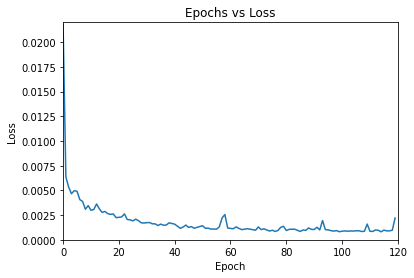

In [15]:
plt.plot(history.history['loss'])
plt.xlim([0, 120])
plt.ylim([0, 0.022])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epochs vs Loss')
plt.show()

# **EVALUATION ON TEST DATA-SET**

In [19]:
evalu= model.evaluate(X_test, Y_test, verbose=0)
print('Mean Squared Error of model on Test Data-Set = ', (evalu[1]))

Mean Squared Error of model on Test Data-Set =  0.0010794269619509578


# **PREDICTION ON TEST DATA-SET**

In [20]:
Y_pred = model.predict(X_test)

In [21]:
Y_test = Y_test/scaler_test.scale_[0]
Y_pred = Y_pred/scaler_test.scale_[0]

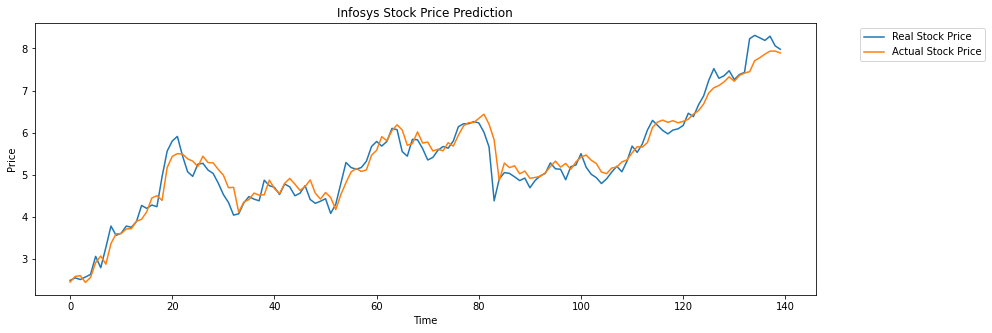

In [22]:
plt.figure(figsize=(14,5))
plt.plot(Y_test, label='Real Stock Price')
plt.plot(Y_pred, label='Actual Stock Price')
plt.title('Infosys Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()